Información del dataset original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


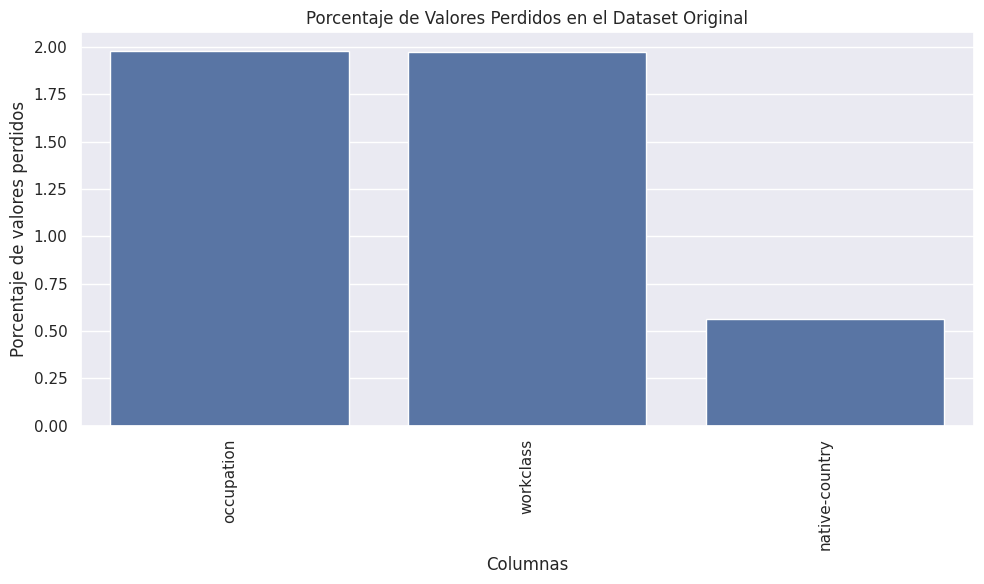


Valores perdidos por columna:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


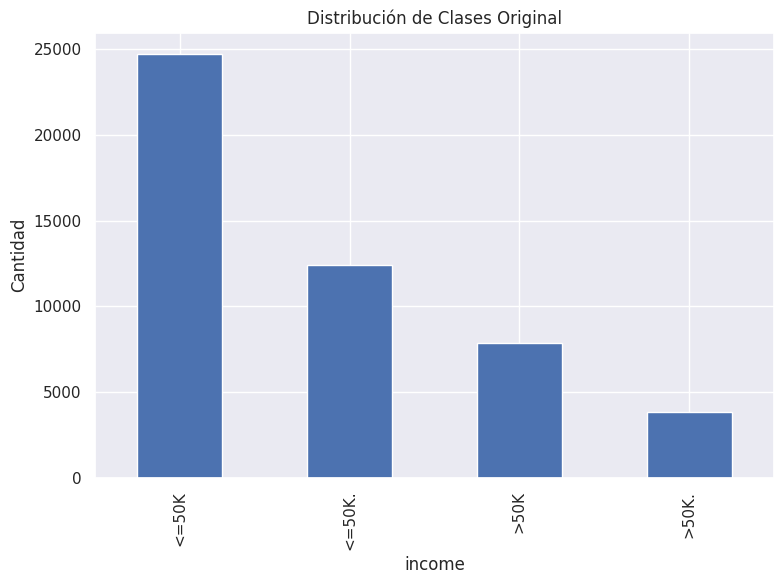


Distribución de clases original:
income
<=50K     0.506122
<=50K.    0.254596
>50K      0.160538
>50K.     0.078744
Name: proportion, dtype: float64

Información del dataset después de imputación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  object
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  object
 3   education       48842 non-null  object
 4   education-num   48842 non-null  object
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  object
 11  capital-loss    48842 non-null  object
 12  hours-per-week  48842 non-null  object
 13  native-country  48842 non-nu

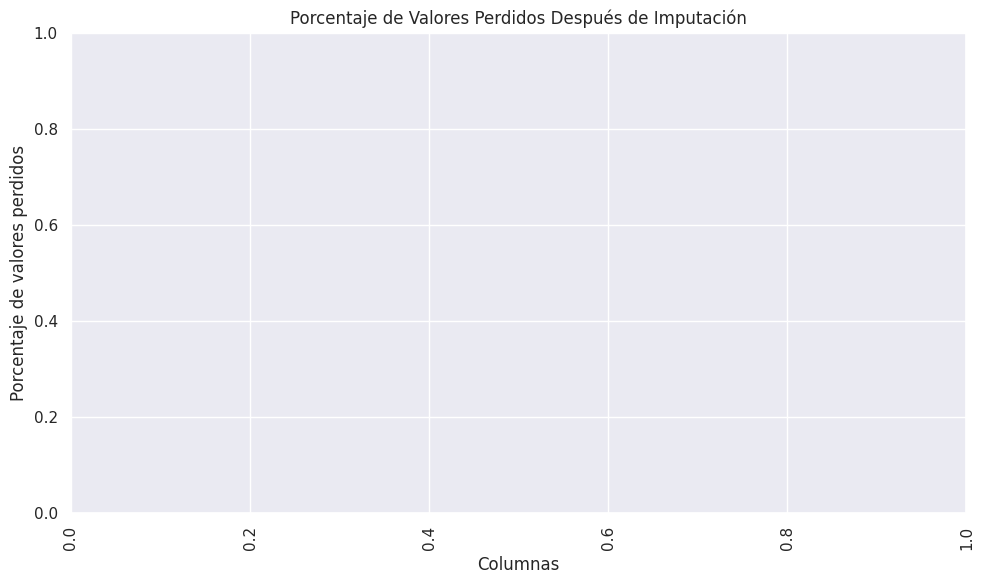


Valores perdidos por columna después de imputación:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


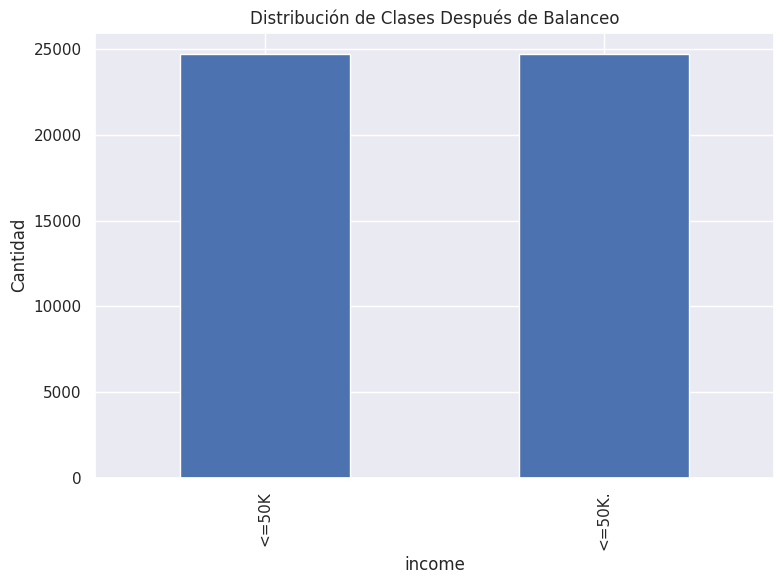


Distribución de clases después de balanceo:
income
<=50K     0.5
<=50K.    0.5
Name: proportion, dtype: float64

Tamaño del dataset original: 48842
Tamaño del dataset balanceado: 49440


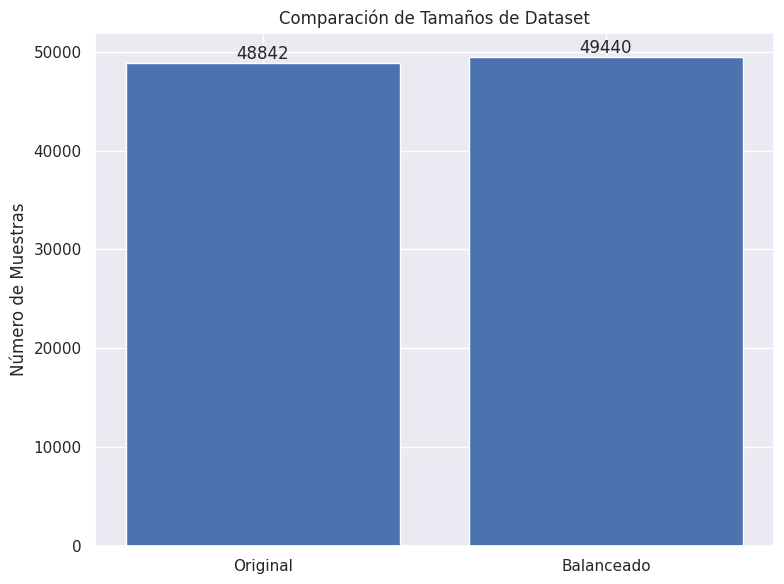

In [6]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set()


adult = fetch_ucirepo(id=2) 
  

X = adult.data.features 
y = adult.data.targets 


df = pd.concat([X, y], axis=1)

# Identificar el nombre de la columna de clase
class_column = y.columns[0]

print("Información del dataset original:")
print(df.info())

# Función para graficar valores perdidos
def plot_missing_values(df, title):
    missing = (df.isnull().sum() / len(df)) * 100
    missing = missing[missing > 0].sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing.index, y=missing.values)
    plt.title(title)
    plt.xlabel('Columnas')
    plt.ylabel('Porcentaje de valores perdidos')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


plot_missing_values(df, 'Porcentaje de Valores Perdidos en el Dataset Original')

print("\nValores perdidos por columna:")
print(df.isnull().sum())

# Gráfico de distribución de clases original
plt.figure(figsize=(8, 6))
df[class_column].value_counts().plot(kind='bar')
plt.title('Distribución de Clases Original')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

print("\nDistribución de clases original:")
print(df[class_column].value_counts(normalize=True))

# Eliminar valores perdidos
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\nInformación del dataset después de imputación:")
print(df_imputed.info())

# Gráfico de valores perdidos después de imputación
plot_missing_values(df_imputed, 'Porcentaje de Valores Perdidos Después de Imputación')

print("\nValores perdidos por columna después de imputación:")
print(df_imputed.isnull().sum())

# Reducir el desbalance de clases
class_counts = df_imputed[class_column].value_counts()
minority_class = class_counts.index[1]
majority_class = class_counts.index[0]
minority_count = class_counts[minority_class]
majority_count = class_counts[majority_class]

# Sobremuestrear la clase minoritaria
minority_df = df_imputed[df_imputed[class_column] == minority_class]
oversampled_minority = minority_df.sample(n=majority_count, replace=True, random_state=42)
df_balanced = pd.concat([df_imputed[df_imputed[class_column] == majority_class], oversampled_minority])

# Gráfico de distribución de clases después de balanceo
plt.figure(figsize=(8, 6))
df_balanced[class_column].value_counts().plot(kind='bar')
plt.title('Distribución de Clases Después de Balanceo')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

print("\nDistribución de clases después de balanceo:")
print(df_balanced[class_column].value_counts(normalize=True))

print("\nTamaño del dataset original:", len(df))
print("Tamaño del dataset balanceado:", len(df_balanced))


plt.figure(figsize=(8, 6))
sizes = [len(df), len(df_balanced)]
labels = ['Original', 'Balanceado']
plt.bar(labels, sizes)
plt.title('Comparación de Tamaños de Dataset')
plt.ylabel('Número de Muestras')
for i, v in enumerate(sizes):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()